# Workshop 6: Acceptance-Rejection Method

In [1]:
import scipy         # Another numerical library
from scipy import integrate

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

### Sampling a Circle

Consider a circle of radius $r$. For whatever reason, we want to deposit uniformly distributed points inside it. Naively, we might proceed as follows:

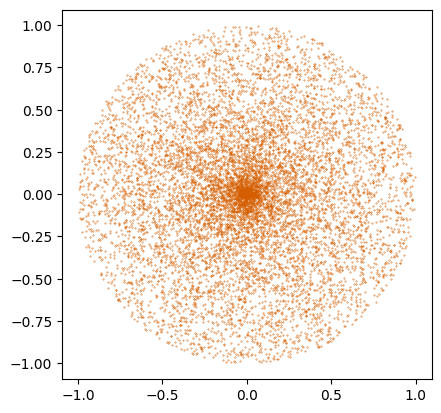

In [5]:
nPts = 10000
pos = np.array([[0.0, 0.0]] * nPts)
radius = 1

for i in range(0, nPts):
    r = radius * np.random.random()
    theta = 2 * np.pi * np.random.random()
    pos[i] = np.array([r * np.cos(theta), r * np.sin(theta)])

fig, ax = plt.subplots()
ax.scatter(pos[:,0], pos[:,1], color = CF_vermillion, s = 0.1)
ax.set_aspect("equal")

One does not need to be a statistician to see that the points are not uniformly distributed. One way to remedy the situation is as follows

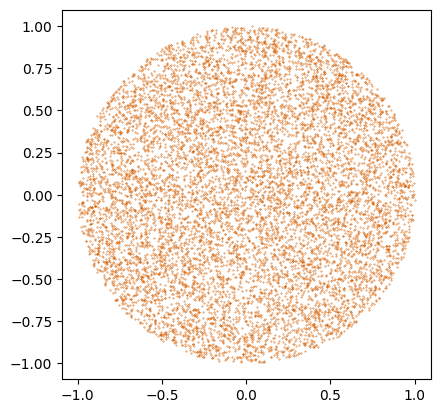

In [11]:
nPts = 10000
pos = np.array([[0.0, 0.0]] * nPts)
radius = 1

for i in range(0, nPts):
    x = 2 * radius
    y = 2 * radius

    while np.sqrt(x ** 2 + y ** 2) > radius :
        x = radius * (2 * np.random.random() - 1)
        y = radius * (2 * np.random.random() - 1)
    pos[i] = np.array([x, y])

fig, ax = plt.subplots()
ax.scatter(pos[:,0], pos[:,1], color = CF_vermillion, s = 0.1)
ax.set_aspect("equal")

The approach that we used is called the **acceptance-rejection method**. It is commonly used to generate random numbers that are supposed to follow a particular distribution.

### Normal Distribution

So far, we have been using the built-in random number generator to produce random numbers with uniform distribution. Sometimes, we will want to produce numbers that follow a normal distribution.

(array([0.00123382, 0.        , 0.        , 0.        , 0.        ,
        0.00123382, 0.        , 0.00123382, 0.        , 0.        ,
        0.00370146, 0.00123382, 0.        , 0.00370146, 0.00493527,
        0.00246764, 0.00246764, 0.01727346, 0.01233818, 0.01727346,
        0.02097491, 0.02220873, 0.02467637, 0.0333131 , 0.03701455,
        0.04194983, 0.04935274, 0.05305419, 0.09130257, 0.08513347,
        0.08636729, 0.11474512, 0.11597894, 0.1468244 , 0.13818767,
        0.1603964 , 0.21221678, 0.19987859, 0.24799751, 0.22208732,
        0.28131061, 0.32449426, 0.28007679, 0.33806626, 0.34176772,
        0.38495136, 0.36027499, 0.400991  , 0.41332919, 0.43183646,
        0.38248373, 0.42319973, 0.38988664, 0.41086155, 0.38124991,
        0.36397645, 0.387419  , 0.32449426, 0.3343648 , 0.31832516,
        0.30845462, 0.24552988, 0.25540042, 0.25046515, 0.22825642,
        0.20358005, 0.18507277, 0.15175967, 0.13942149, 0.14312294,
        0.11227748, 0.10364075, 0.09130257, 0.08

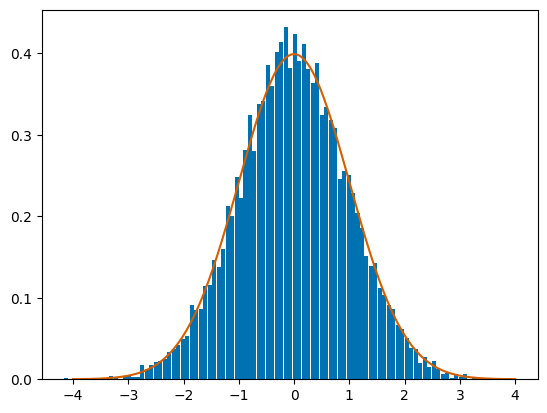

In [18]:
nDraws = 10000
mean = 0 
stdv = 1
draws = np.random.normal(mean, stdv, nDraws)

lim = 4
n_xs = 200
xs = np.linspace(-lim, lim, n_xs)

def gauss(x):
    return np.exp(-(x - mean) ** 2 / (2 * stdv ** 2)) / np.sqrt(2 * np.pi * stdv ** 2)

gauss_res = [gauss(x) for x in xs]

fig, ax = plt.subplots()
ax.plot(xs, gauss_res, color = CF_vermillion)
ax.hist(draws, bins = 100, density = True, rwidth = 0.9, color = CF_blue)

Let us now write our own generator for normally distributed numbers. We can use a method similar to the one we used for the circle. From the illustration above, we see that we can generate pairs of numbers: $y\in[0,0.45]$ and $x\in[-4,4]$ and keep only the pairs that fall under the curve. The corresponding $x$ coordinates are the desired numbers.

In reality, the normal distribution does not terminate at $4$, but it is quite unlikely that we will encounter numbers outside 4$\sigma$. We can, of course, increase the range.

In [ ]:
nPts = 10000
pos = np.array([[0.0, 0.0]] * nPts)
mean = 0 
stdv = 1

def gauss(x):
    return np.exp(-(x - mean) ** 2 / (2 * stdv ** 2)) / np.sqrt(2 * np.pi * stdv ** 2)

square_x = 8
square_y = 0.45
for i in range(0, nPts):
    x = square_x
    y = square_y

    while np.sqrt(x ** 2 + y ** 2) > radius :
        x = radius * (2 * np.random.random() - 1)
        y = radius * (2 * np.random.random() - 1)
    pos[i] = np.array([x, y])

fig, ax = plt.subplots()
ax.scatter(pos[:,0], pos[:,1], color = CF_vermillion, s = 0.1)
ax.set_aspect("equal")

When using the acceptrance-rejection method, the performance is improved if the random number box hugs the curves as closely as possible. This reduces the number of points that will be rejected, speeding up the process.

#### Important:

Sometimes we do not know the normalization constant of the distribution function. This, however, does not present a problem. What is important for us is not the absolute probability of a given value being drawn, but rather its probability relative to that of other values.


### Ideal Gas

For a particle at temperature $T$, the probability to be found in a state with energy $E_n$ is 

$$P_n = e^{-\beta E_n}/Z\,,$$

where $\beta = 1/k_B T$ with $k_B$ being the Boltzmann constant, and $Z = \sum_n e^{-\beta E_n}$ is the partition function. The sum in the partition function runs over all available states. In the probability expression, the partition function acts as a normalization constant and, as such, is inconsequential for the acceptance-rejection method.

Let us use this information to study the behavior of nitrogen gas at temperature $T$. Assuming no interaction between gas molecules, the energy for a single $N_2$ molecule is purely kinetic: $E = mv^2/2$. This sets the term inside the exponential to $-mv^2/(2k_BT)$. Here, both $m$ and $k_B$ are small numbers. As we will learn better later, it is generally a good practice to avoid dealing with very small or very large numbers. To circumvent this issue, we rewrite the Boltzmaan constant using the gas constant $R = 8.314 \mathrm{J\,K^{-1}\,mol^{-1}}$ and the Avogadro's number as

$$
-\frac{mv^2}{2k_BT} = -\frac{mv^2N_A}{2RT} = -\frac{Mv^2}{2RT}\,,
$$

where $M =0.028$ kg/mol is the molar mass of $N_2$. This sets
$$
-\frac{mv^2}{2k_BT} \approx -\frac{0.0017 v^2}{T}\,,
$$
removing the overly small numbers from the expression.


#### You Try!
Write a function that returns a single 3D velocity of a molecule that obeys the distribution above. Next, run the function above "enough" times to sample the distribution and plot the histogram of speeds.